In [1]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [2]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [3]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [6]:
from PIL import Image
from torchvision import transforms

def preprocess(image_path,max_size = 500):
  image = Image.open(image_path).convert('RGB')

  if max(image.size) > max_size :
    size = max_size
  else:
    size = max(image.size)
  
  image_transforms = transforms.Compose([transforms.Resize(size),transforms.ToTensor(),transforms.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])])
  image = image_transforms(image)
  image = image.unsqueeze(0)
  return image


In [7]:
content_p = preprocess('content_image.jpg')
style_p = preprocess('style_image.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print('Content_image Shape:',content_p.shape)
print('Style_image Shape:',style_p.shape)


Content_image Shape: torch.Size([1, 3, 500, 924])
Style_image Shape: torch.Size([1, 3, 500, 724])


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0)
  image = image.transpose(1,2,0)
  image = image * np.array([0.229,0.224,0.225])+ np.array([0.485,0.465,0.406]) 
  image = image.clip(0,1)

  return image

In [10]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print('Deprocessed Content_image Shape:',content_d.shape)
print('Deprocessed Style_image Shape:',style_d.shape)

Deprocessed Content_image Shape: (500, 924, 3)
Deprocessed Style_image Shape: (500, 724, 3)


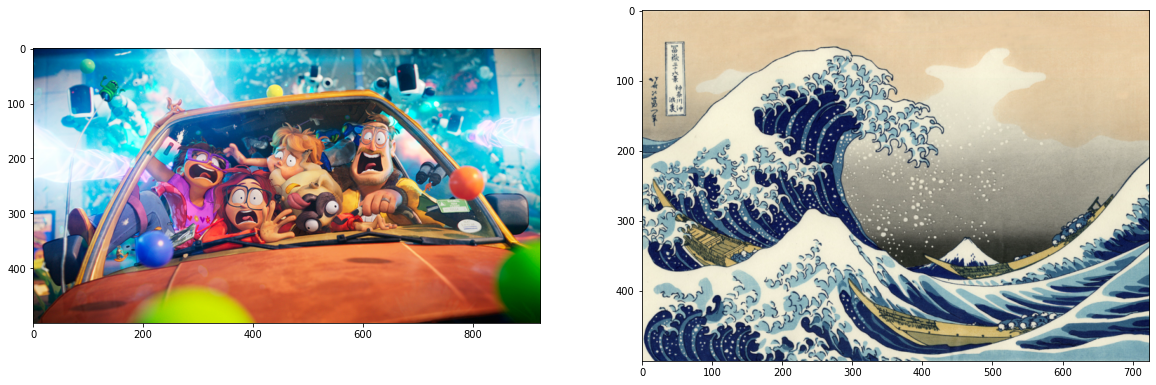

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(content_d)
ax2.imshow(style_d)

In [12]:
def get_features(preprocessed_image,model):
  x = preprocessed_image
  layers = {
      '0':'conv1_1',
      '5':'conv2_1',
     '10':'conv3_1',
     '19':'conv4_1',
     '21':'conv4_2',
     '28':'conv5_1'
 }
 
 
  features={}
  for name,layer in model._modules.items():
    x = layer(x)
    if name in layers:
      features[layers[name]] = x
  return features

In [13]:
content_features = get_features(content_p,vgg)
style_features = get_features(style_p,vgg)

In [14]:
def gram_matrix(tensor):
  batch_size,nb_channels,height,width = tensor.shape
  tensor = tensor.view(nb_channels,height*width)
  gram = torch.mm(tensor,tensor.t())

  return gram

In [15]:
style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

In [16]:
def content_loss(target_conv4_2,content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)

  return loss

In [17]:
style_weights = {
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

In [18]:
def style_loss(style_weights,target_features,style_grams):
  loss = 0
  for layer in style_weights:

    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    batch_size,nb_channels,height,width = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss +=layer_loss/(nb_channels*height*width)
  return loss


In [19]:
target = content_p.requires_grad_(True).to(device)
target_features = get_features(target,vgg)
print('Content Loss:',content_loss(target_features['conv4_2'],content_features['conv4_2']))
print('Syle Loss:',style_loss(style_weights,target_features,style_grams))

Content Loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Syle Loss: tensor(918.0283, device='cuda:0', grad_fn=<AddBackward0>)


In [20]:
from torch import optim
 
optimizer = optim.Adam([target],lr=0.003)
 
alpha = 1
beta = 1e5
 
nb_epochs = 6000
show_every = 500

In [21]:
def total_loss(c_loss,s_loss,alpha,beta):
  return (alpha*c_loss) + (beta*s_loss)

Total loss at Epoch 0: 91802824.0


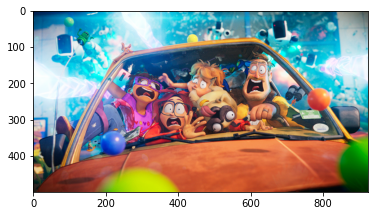

Total loss at Epoch 500: 3358279.0


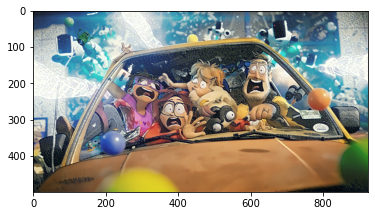

Total loss at Epoch 1000: 1010591.4375


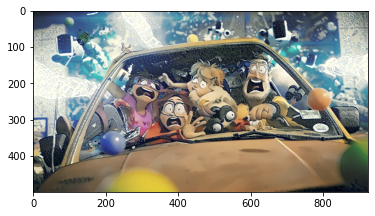

Total loss at Epoch 1500: 551466.5625


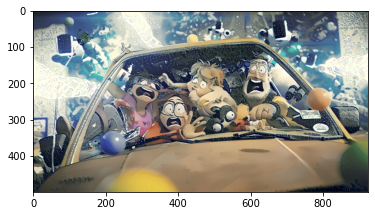

Total loss at Epoch 2000: 376059.375


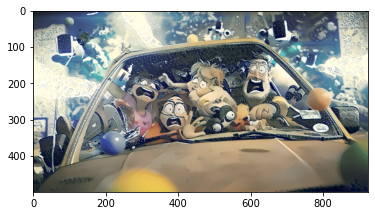

Total loss at Epoch 2500: 284320.75


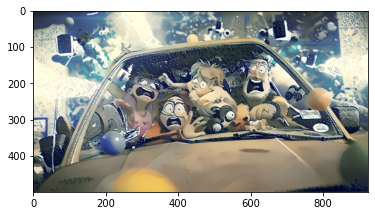

Total loss at Epoch 3000: 227931.0


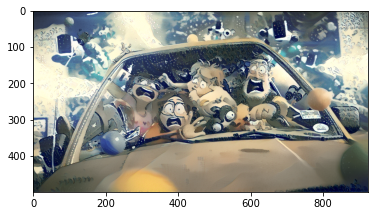

Total loss at Epoch 3500: 190500.15625


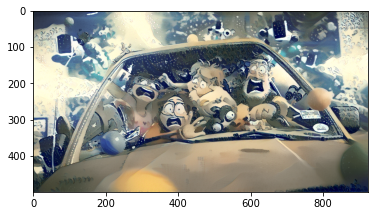

Total loss at Epoch 4000: 163421.078125


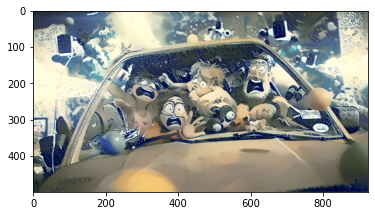

Total loss at Epoch 4500: 142577.78125


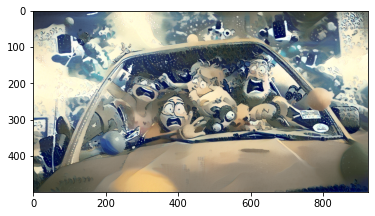

Total loss at Epoch 5000: 126235.5390625


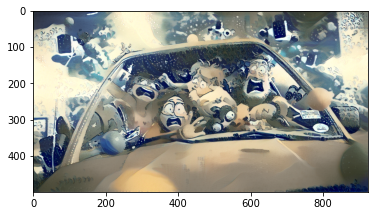

Total loss at Epoch 5500: 113168.546875


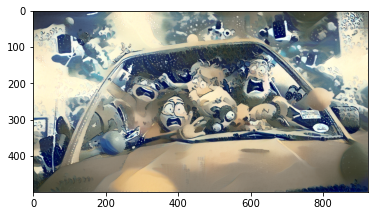

In [22]:
results = []

for i in range(nb_epochs):
  target_features = get_features(target,vgg)
  c_loss = content_loss(target_features['conv4_2'],content_features['conv4_2'])
  s_loss = style_loss(style_weights,target_features,style_grams)
  t_loss = total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if (i % show_every == 0):
    print('Total loss at Epoch {}: {}'.format(i,t_loss))
    plt.imshow(deprocess(target.detach()))
    plt.show()
    results.append(deprocess(target.detach()))

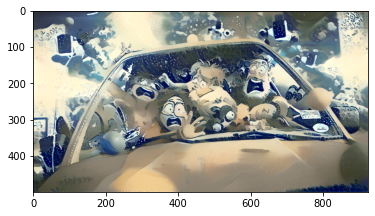

In [23]:
target_copy = deprocess(target.detach())
plt.imshow(target_copy)